# Seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.  

It operates on complete dataset and perform the necessary *semantic mapping* and *statistical aggregation* to produce informative plots. Its dataset-oriented, declarative API allows you to focus on what the different elements of your plots mean, rather than on the details of how to draw them.

Seaborn plotting functions can be either as “axes-level” or “figure-level”. Axes-level functions plot data onto a single matplotlib.pyplot.Axes object while the figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid that manages the figure, and allows plotting data onto multiple matplotlib.pyplot.Axes (subplots). The single figure-level function offers a unitary interface to its various axes-level functions. The organization looks a bit like this:

<img src="images/sns_function_overview.png"/>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A Quick Example

The following is an example of plotting using the Seaborn library. 

In [3]:
data = pd.read_csv("datasets/salary.csv", index_col=0)[:1000]
data.head()

,District,Salary,Age,English,Education,Gender
0,Brooklyn,120000.0,31,Only language,Academic degree,Male
1,Brooklyn,45000.0,28,Only language,Academic degree,Female
2,Manhatten,85000.0,54,Only language,Academic degree,Male
3,Manhatten,12000.0,45,Only language,High school diploma,Female
4,Brooklyn,0.0,75,Very well,Academic degree,Female


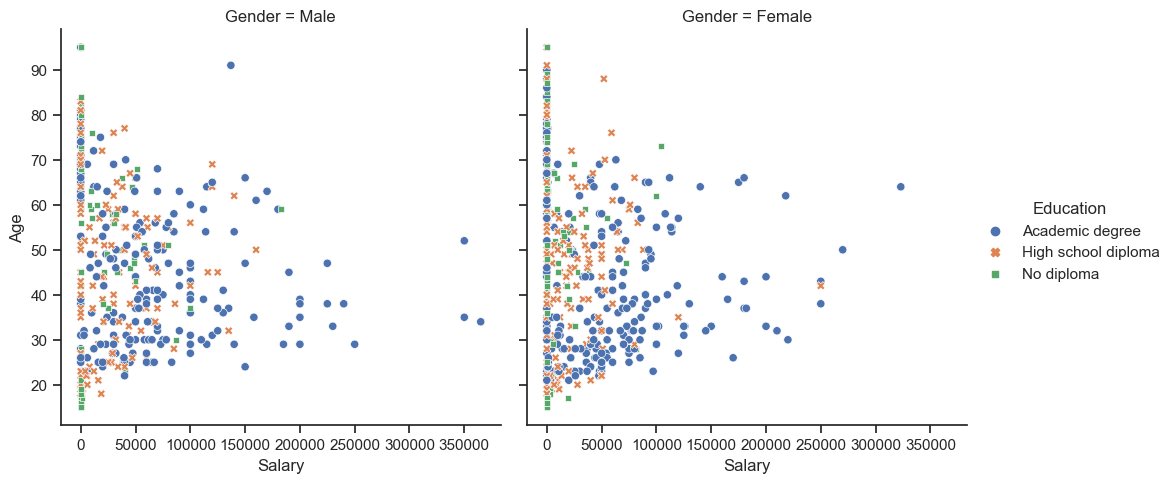

In [4]:
sns.set(style="ticks")
sns.relplot(x="Salary", y="Age", 
            hue="Education", style="Education", 
            col="Gender", 
            data=data)

Notice how we provided only the names of the variables (e.g. *Salary*, *Age*, *Education*, *Gender*), which are the correponding column names in the dataframe) and their roles (e.g *x* or *y-axis* values, *hue*, *col*) in the plot. Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands. This declarative approach lets you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.

## Controlling Figure Aesthetics

In Seaborn, we can use customized themes and a high-level interface for controlling the appearance of Matplotlib figures. 

Below is the default look of from the plot using Matplotlib. 

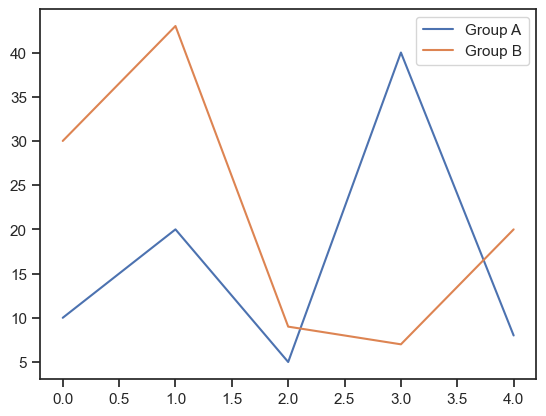

In [5]:
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
plt.legend()
plt.show()

To switch to the Seaborn defaults, simply call the `set_theme()` function:

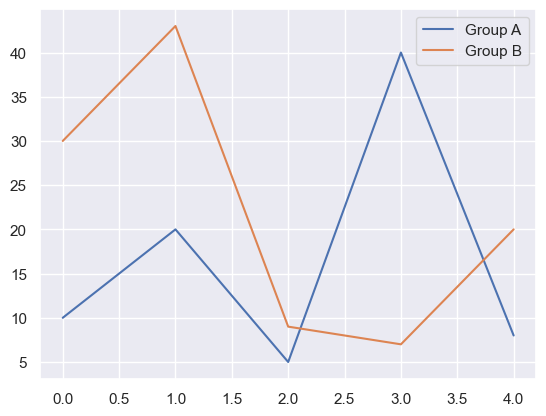

In [6]:
sns.set_theme()
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
plt.legend()
plt.show()

## Seaborn Figure Styles

To control the plot style, Seaborn provides two methods: `set_style()`and `axes_style()`

[set_style()]((https://seaborn.pydata.org/generated/seaborn.set_style.html) sets the aesthetic style of the plots.

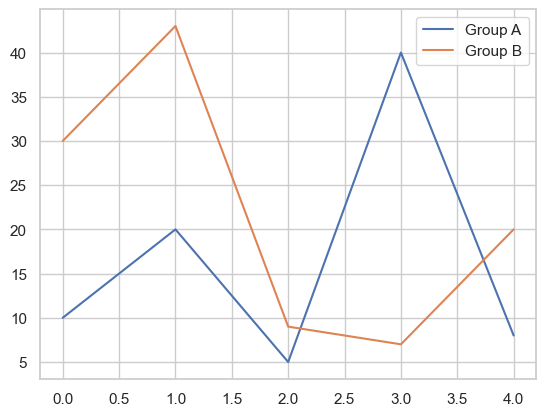

In [7]:
sns.set_style("whitegrid")
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
plt.legend()
plt.show()

[axes_style()](https://seaborn.pydata.org/generated/seaborn.axes_style.html) returns a parameter dictionary for the aesthetic style of the plots. The function can be used in a `with` statement to temporarily change the style parameters.

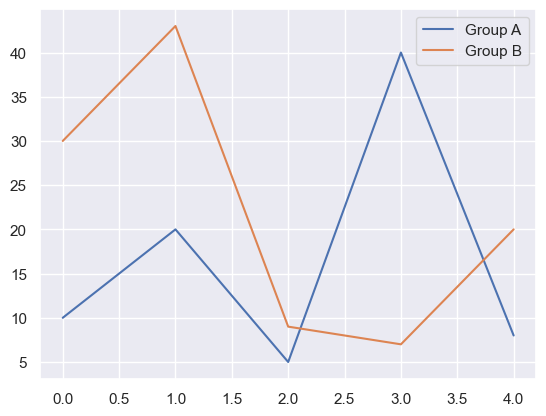

In [8]:
sns.set_theme()
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
with sns.axes_style('darkgrid'):
    plt.plot(x1, label='Group A')
    plt.plot(x2, label='Group B')
plt.legend()
plt.show()

## Removing Axes Spines

Sometimes, it might be desirable to remove the top and right axes spines. The despine() function is used to remove the top and right axes spines from the plot:

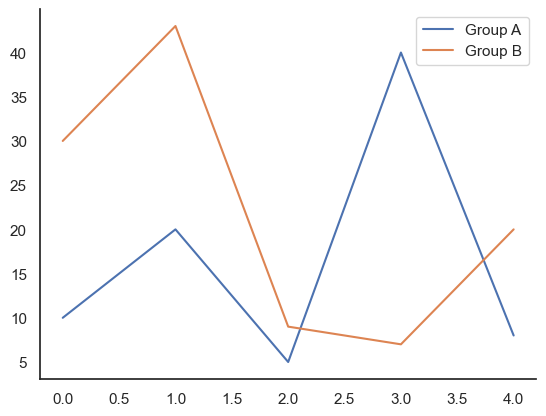

In [9]:
sns.set_style("white")
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
sns.despine()
plt.legend()
plt.show()

## Controlling the Scale of Plot Elements

A separate set of parameters controls the scale of plot elements. This is a handy way to use the same code to create plots that are suited for use in contexts where larger or smaller plots are necessary. To control the context, two functions can be used.

[set_context()](https://seaborn.pydata.org/generated/seaborn.set_context.html) sets the plotting context parameters. This does not change the overall style of the plot but affects things such as the size of the labels and lines. The base context is a *notebook*, and the other contexts are *paper*, *talk*, and *poster*—versions of the notebook parameters scaled by 0.8, 1.3, and 1.6, respectively.

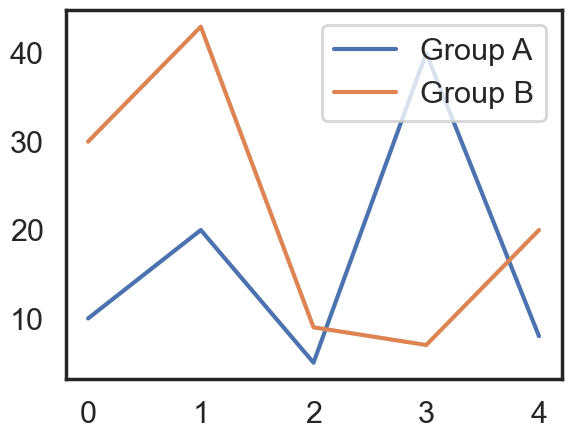

In [10]:
sns.set_context("poster")
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
plt.legend()
plt.show()

## Color Palettes

There are three general groups of color palettes, namely, categorical, sequential, and diverging, which we will break down in the following sections.                                      

## Categorical Color Palettes

Categorical palettes (or qualitative color palettes) are best suited for distinguishing categorical data that does not have an inherent ordering. Some examples where it is suitable to use categorical color palettes are line charts showing stock trends for different companies, and a bar chart with subcategories; basically, any time you want to group your data. 

There are six default themes in Seaborn: deep, muted, bright, pastel, dark, and colorblind

In [11]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## Sequential Color Palettes

Sequential color palettes are appropriate for sequential data ranges from low to high values, or vice versa. It is recommended to use bright colors for low values and dark ones for high values. Some examples of sequential data are absolute temperature, weight, height, or the number of students in a class.

One of the sequential color palettes that Seaborn offers is cubehelix palettes. They have a linear increase or decrease in brightness and some variation in hue, meaning that even when converted to black and white, the information is preserved.

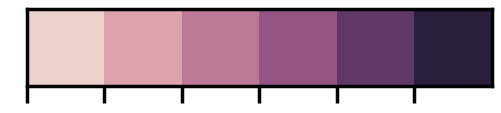

In [5]:
sns.palplot(sns.cubehelix_palette())

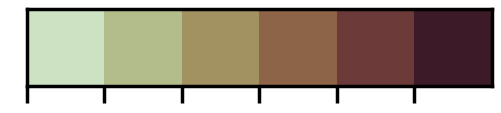

In [6]:
sns.palplot(sns.cubehelix_palette(start=0.5, rot=0.5))

Creating custom sequential palettes that only produce colors that start at either light or dark desaturated colors and end with a specified color can be accomplished with light_palette() or dark_palette().

[(0.9520626552335513, 0.9400494953206417, 0.9519720393961805), (0.961650124186841, 0.7520395962565134, 0.9615776315169444), (0.9712375931401308, 0.564029697192385, 0.9711832236377083), (0.9808250620934205, 0.3760197981282567, 0.9807888157584722), (0.9904125310467102, 0.18800989906412835, 0.990394407879236), (1.0, 0.0, 1.0)]


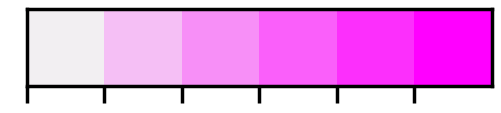

In [7]:
x = sns.light_palette("magenta")
print(x)
sns.palplot(x)

In [8]:
sns.dark_palette("magenta")

[(0.1694933011837922, 0.1380662086152075, 0.1694785341696071),
 (0.33559464094703373, 0.110452966892166, 0.3355828273356857),
 (0.5016959807102753, 0.0828397251691245, 0.5016871205017642),
 (0.6677973204735168, 0.055226483446083, 0.6677914136678428),
 (0.8338986602367584, 0.0276132417230415, 0.8338957068339214),
 (1.0, 0.0, 1.0)]

By default, creating a color palette only returns a list of colors. If you want to use it as a colormap object, for example, in combination with a heatmap, set the as_cmap=True argument, as demonstrated in the following example:

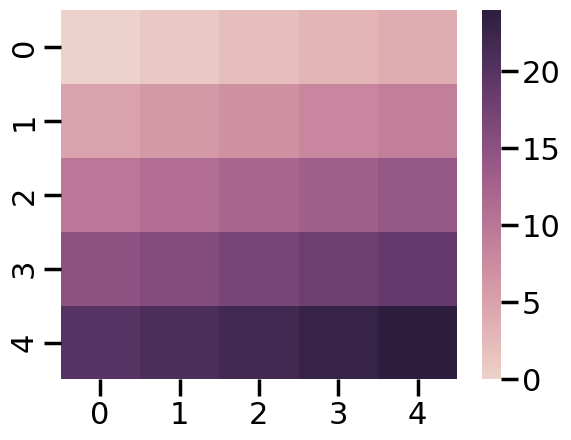

In [9]:
x = np.arange(25).reshape(5, 5)
ax = sns.heatmap(x, cmap=sns.cubehelix_palette(as_cmap=True))

## Diverging Color Palettes

Diverging color palettes are used for data that consists of a well-defined midpoint. An emphasis is placed on both high and low values. For example, if you are plotting any population *changes* for a particular region from some baseline population, it is best to use diverging colormaps to show the relative increase and decrease in the population. 

Seaborn provides few diverging palettes, e.g. `vlag`, `icefire`.  Matplotlib also provides a few, e.g. `Spectral` and `coolwarm`,

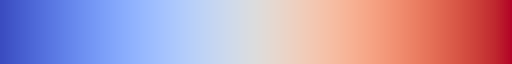

In [10]:
sns.color_palette('coolwarm', as_cmap=True)

You can also specify your own custom colormap for diverging data. This function makes diverging palettes using the husl color system. You pass it two hues (in degrees) and, optionally, the lightness and saturation values for the extremes.

You can refer to the hue wheel used here: 

<img src="images/color_wheel.png" width=60% />

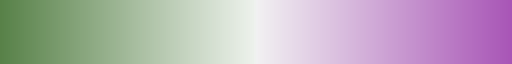

In [11]:
sns.diverging_palette(120, 300, s=60, as_cmap=True)

## Heat Maps

Let's see how we can generate a heatmap using Seaborn. We will learn how to choose an appropriate color palette for the given data. 

You are asked to visualize the surface temperature change for the Northern Hemisphere for past years. Data from the GISS Surface Temperature Analysis is used, which contains estimates of global surface temperature change (in degree Celsius) for every month. The dataset contains temperature anomalies for every month from 1880 to the present. Temperature anomalies indicate how much warmer or colder it is than normal. For the GISS analysis, normal means the average over the 30-year period 1951-1980.


In [105]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [106]:
data = pd.read_csv('datasets/northern_surface_temperature.csv', index_col=['Year'])
data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-0.34,-0.50,-0.23,-0.29,-0.05,-0.15,-0.17,-0.25,-0.22,-0.30,-0.42,-0.39
1881,-0.30,-0.21,-0.03,0.01,0.04,-0.32,0.09,-0.03,-0.25,-0.42,-0.35,-0.22
1882,0.28,0.23,0.03,-0.30,-0.24,-0.28,-0.26,-0.13,-0.23,-0.51,-0.31,-0.67
1883,-0.56,-0.64,-0.14,-0.29,-0.24,-0.10,-0.04,-0.21,-0.32,-0.15,-0.44,-0.14
1884,-0.16,-0.11,-0.63,-0.59,-0.36,-0.40,-0.44,-0.49,-0.44,-0.43,-0.55,-0.46


Since we want to visualize the temperature changes over the years, it makes sense to have the years on the x-axis, and the months on the y-axis.  We can do this easily by doing a transpose on the dataframe.

In [107]:
data = data.transpose()
data.head(10)

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Jan,-0.34,-0.30,0.28,-0.56,-0.16,-0.99,-0.71,-1.05,-0.46,-0.25,...,0.83,0.81,0.61,0.67,0.86,0.97,1.19,1.55,1.39,1.14
Feb,-0.50,-0.21,0.23,-0.64,-0.11,-0.43,-0.80,-0.67,-0.57,0.33,...,0.70,0.94,0.57,0.59,0.79,0.71,1.18,1.93,1.50,1.23
Mar,-0.23,-0.03,0.03,-0.14,-0.63,-0.21,-0.69,-0.41,-0.60,0.00,...,0.60,1.10,0.88,0.72,0.81,1.20,1.32,1.91,1.51,1.18
Apr,-0.29,0.01,-0.30,-0.29,-0.59,-0.47,-0.34,-0.35,-0.18,0.18,...,0.70,1.13,0.85,1.07,0.68,1.08,1.03,1.49,1.20,0.97
May,-0.05,0.04,-0.24,-0.24,-0.36,-0.56,-0.30,-0.22,-0.13,-0.01,...,0.66,0.94,0.66,0.97,0.78,0.90,1.04,1.11,0.92,1.01
Jun,-0.15,-0.32,-0.28,-0.10,-0.40,-0.42,-0.34,-0.18,0.00,-0.05,...,0.68,0.85,0.76,0.94,0.77,0.81,1.05,1.12,0.93,0.86
Jul,-0.17,0.09,-0.26,-0.04,-0.44,-0.31,-0.11,-0.21,0.03,-0.06,...,0.68,0.89,0.73,0.85,0.70,0.76,0.92,1.04,0.96,0.90
Aug,-0.25,-0.03,-0.13,-0.21,-0.49,-0.37,-0.40,-0.51,-0.18,-0.18,...,0.72,0.87,0.71,0.76,0.73,0.89,1.01,1.11,1.01,0.86
Sep,-0.22,-0.25,-0.23,-0.32,-0.44,-0.36,-0.30,-0.18,-0.17,-0.28,...,0.85,0.71,0.74,0.86,0.70,0.83,1.16,1.22,1.00,0.96
Oct,-0.30,-0.42,-0.51,-0.15,-0.43,-0.33,-0.28,-0.46,0.00,-0.39,...,0.79,0.89,0.91,0.91,0.83,0.93,1.29,1.03,1.05,1.23


In [108]:
data.iloc[:, ::5].head(20)

Year,1880,1885,1890,1895,1900,1905,1910,1915,1920,1925,...,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
Jan,-0.34,-0.99,-0.62,-0.67,-0.59,-0.40,-0.34,-0.26,-0.15,-0.29,...,-0.02,0.16,0.21,0.07,0.47,0.75,0.38,0.94,0.81,1.19
Feb,-0.50,-0.43,-0.58,-0.78,-0.11,-0.81,-0.39,-0.09,-0.30,-0.39,...,0.27,0.09,0.41,-0.29,0.54,1.19,0.89,0.72,0.94,1.18
Mar,-0.23,-0.21,-0.46,-0.47,0.08,-0.22,-0.49,-0.24,0.00,-0.23,...,-0.07,0.10,0.07,0.00,1.16,0.59,0.83,0.94,1.10,1.32
Apr,-0.29,-0.47,-0.22,-0.16,-0.08,-0.44,-0.40,0.07,-0.21,-0.16,...,-0.02,0.05,0.15,-0.03,0.70,0.71,0.88,0.92,1.13,1.03
May,-0.05,-0.56,-0.34,-0.28,-0.01,-0.28,-0.30,-0.01,-0.21,-0.22,...,-0.01,-0.02,0.26,0.09,0.50,0.41,0.54,0.78,0.94,1.04
Jun,-0.15,-0.42,-0.14,-0.18,-0.07,-0.26,-0.45,-0.12,-0.25,-0.25,...,0.01,-0.08,0.19,0.00,0.48,0.50,0.44,0.79,0.85,1.05
Jul,-0.17,-0.31,-0.21,-0.16,-0.09,-0.21,-0.38,-0.09,-0.25,-0.25,...,-0.04,-0.06,0.14,-0.08,0.32,0.37,0.42,0.75,0.89,0.92
Aug,-0.25,-0.37,-0.37,-0.25,-0.06,-0.22,-0.40,-0.16,-0.32,-0.18,...,-0.05,-0.13,0.09,-0.02,0.41,0.53,0.47,0.69,0.87,1.01
Sep,-0.22,-0.36,-0.33,-0.03,0.00,-0.18,-0.42,-0.21,-0.35,-0.05,...,-0.05,-0.07,0.10,0.03,0.42,0.43,0.37,0.90,0.71,1.16
Oct,-0.30,-0.33,-0.08,-0.06,0.26,-0.25,-0.31,-0.27,-0.40,-0.08,...,-0.20,-0.18,0.11,0.02,0.48,0.60,0.29,0.95,0.89,1.29


Let's create a custom-diverging palette that diverges to blue (240 degrees on the hue wheel) for low values and to red (15 degrees on the hue wheel) for high values. Set the saturation as s=99. Make sure that the diverging_palette() function returns a colormap by setting as_cmap=True:

In [109]:
heat_colormap = sns.diverging_palette(240, 15, s=99, as_cmap=True)

We will plot the heatmap for every 5 years. To ensure that the neutral color corresponds to no temperature change (the value is zero), set center=0:

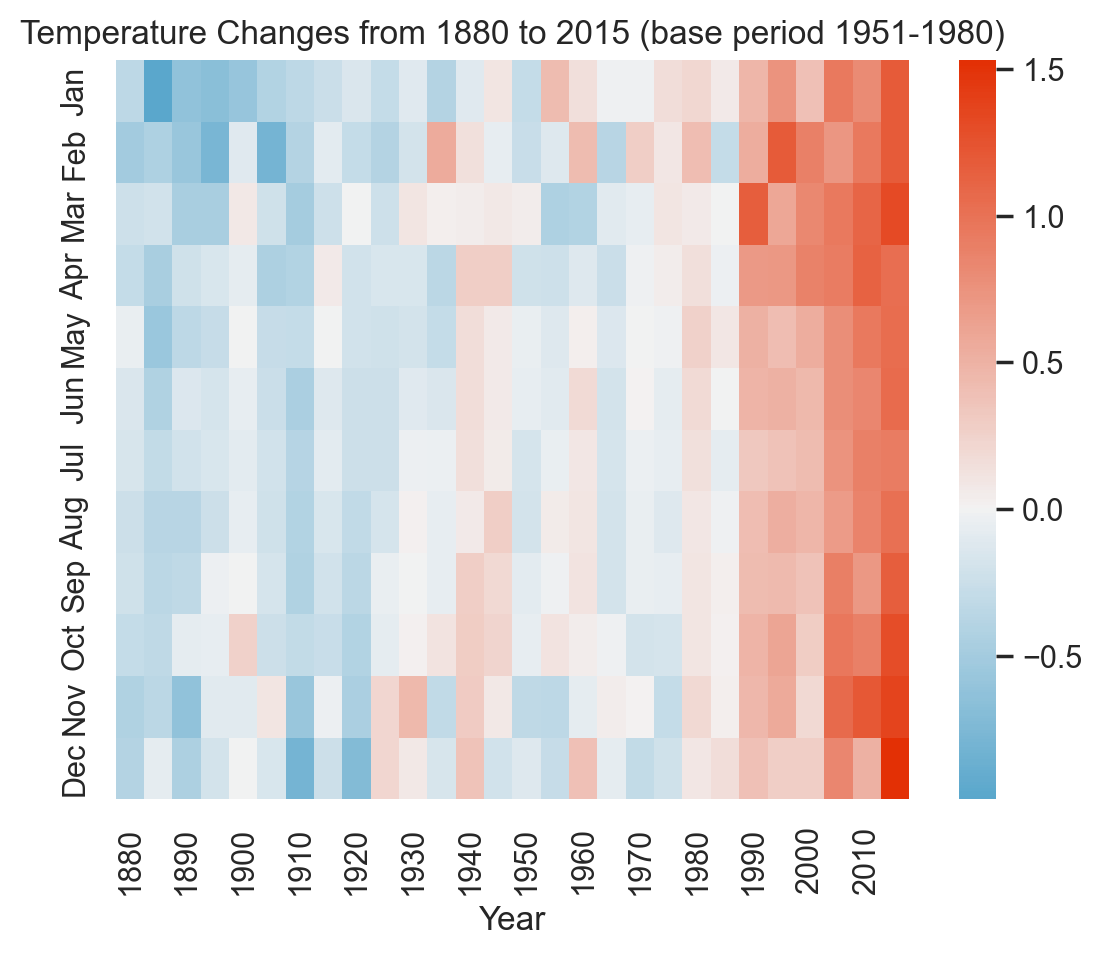

In [110]:
plt.figure(dpi=200)

sns.heatmap(data.iloc[:, ::5], cmap=heat_colormap, center=0)
plt.title("Temperature Changes from 1880 to 2015 (base period 1951-1980)")
plt.savefig('temperature_change.png', dpi=300, bbox_inches='tight')

### Exercise:

In this activity, we will use a heatmap to find patterns in flight passenger data. The goal of this activity is to apply your knowledge about color palettes to choose a suitable color palette for this data.

1. Use pandas to read the flight_details.csv dataset located in the datasets folder. The given dataset contains the monthly figures for flight passengers for the years 1949 to 1960. 
2. Transform the data into a form suitable for display on heatmap.
2. Use a heatmap to visualize the given data.
3. Use your own appropriate colormap. Make sure that the lowest value is the brightest, and the highest the darkest, color. After executing the preceding steps, the expected output should be as follows:

<img src="images/heatmap_ex.png" width=60% />


In [5]:
# Step 0: Import packages 

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

# Step 1: Use pandas to read the flight_details.csv dataset located in the datasets folder. 



# Step 2: Transform the data into a form suitable for display on heatmap (hint: using pd.pivot())



# Step 2a: Sort the index of the transformed dataframe using the Dataframe.reindex()

months = ['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December']



## Alternatively we can use sort_index with mapping 

# def remap(x):    # return the index position of any given month x
#     months = ['January', 'February', 'March', 'April', 'May', 'June',
#                      'July', 'August', 'September', 'October', 'November', 'December']
#     return [ months.index(e) for e in x ]
# data_wide.sort_index(key=remap)


# Step 3: Use a heatmap to visualize the given data. Use the appropriate colormap. 
#         Make sure that the lowest value is the brightest, and the highest the darkest color
#         




<details><summary>Click here for solution</summary>

```python

# Step 0: Import packages 

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

# Step 1: Use pandas to read the flight_details.csv dataset located in the datasets folder. 
data = pd.read_csv('datasets/flight_details.csv')
print(data.info())

# Step 2: Transform the data into a form suitable for display on heatmap (hint: using pd.pivot())
data_wide = pd.pivot(data, index='Months', columns='Years', values='Passengers')
print(data_wide)

# Step 2a: Sort the index of the transformed dataframe using the Dataframe.reindex()
months = ['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December']

data_wide_sorted = data_wide.reindex(months)

## Alternatively we can use sort_index with mapping 

# def remap(x):    # return the index position of any given month x
#     months = ['January', 'February', 'March', 'April', 'May', 'June',
#                      'July', 'August', 'September', 'October', 'November', 'December']
#     return [ months.index(e) for e in x ]
# data_wide.sort_index(key=remap)


# Step 3: Use a heatmap to visualize the given data. Use the appropriate colormap. 
#         Make sure that the lowest value is the brightest, and the highest the darkest color
#         

plt.figure(dpi=100)
color_map = sns.cubehelix_palette(rot=-0.7,as_cmap=True)
sns.heatmap(data_wide_sorted, cmap=color_map)
plt.title("Flight Passengers from 1949 to 1960")
plt.show()


```
    
</details>